# Thyroid Detection using Data Science

# Exploratory Data Analysis
We will first perform EDA in the below notebook. I am going to understand the data using python libraries such as pandas, numpy, matplotlib etc. I will perform various operations such as imputing using KNNImputer to improve the data quality. More detailed steps performed on the data during EDA are mentioned in the notebook both as the markdown rows or else comments near the code 

In [1]:
# importing all the required libraries
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.utils import resample
from imblearn.over_sampling import SMOTENC,RandomOverSampler,KMeansSMOTE
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
import pickle
import os
sns.set()

In [2]:
folder_path ='models'

# This piece of code checks if the model folder exists in the current directory, 
#if it does not exist it creates one. If it exists it checks for any files inside it. 
# If there is any file it it deletes them and makes it clean.


# Checks if folder exists
if os.path.isdir(folder_path):
    # Delete all objects in folder
    for object in os.listdir(folder_path):
        object_path = os.path.join(folder_path, object)
        if os.path.isfile(object_path):
            os.remove(object_path)
        elif os.path.isdir(object_path):
            os.rmdir(object_path)
else:
    os.mkdir(folder_path)

In [3]:
# Loading the dataset
df = pd.read_csv("G:\\My Drive\\UALR\\Spring-2023\\Data_Science\\Project\\Submission\\Thyroid_Project\\raw_data\\raw_data.csv")

In [4]:
# Having a look at the data
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative.|3733
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative.|1442
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative.|2965
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative.|806
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative.|2807


In [5]:
# Knowing the number of rows and columns
df.shape

(2800, 30)

In [6]:
# Removing the unwanted data afte the period (.) from the Class column
df['Class'] = (df['Class'].str.split('.',expand=True))[0]

In [7]:
df['Class'].unique() # Checking the unique values

array(['negative', 'compensated hypothyroid', 'primary hypothyroid',
       'secondary hypothyroid'], dtype=object)

In [8]:
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'Class'],
      dtype='object')

In [9]:
# getting a sense of the data
df.describe() 

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
count,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,...,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800
unique,94,3,2,2,2,2,2,2,2,2,...,2,218,2,139,2,210,1,1,5,4
top,59,F,f,f,f,f,f,f,f,f,...,t,?,t,?,t,?,f,?,other,negative
freq,75,1830,2470,2760,2766,2690,2759,2761,2752,2637,...,2616,184,2503,297,2505,295,2800,2800,1632,2580


We can see from the data description that there are no missing values. But if you check the dataset the missing values are replaced with invalid values like '?'. I am going to replace '?' with nan and again check for missing values.

In [10]:
for column in df.columns:
    count = df[column][df[column]=='?'].count()
    if count!=0:
        print(column, df[column][df[column]=='?'].count())

age 1
sex 110
TSH 284
T3 585
TT4 184
T4U 297
FTI 295
TBG 2800


We can see the number of '?' in the data after running the above code. We need to replace the '?' with the nan and impute the data to eliminate the missing values. Also, the column TBG is having only '?' values which is not useful, so I am going to drop it. It is interesting to note that there are some columns denoted by measured that contains only True or False, they are used to indicate that the next column values are containing any values. So, we need to drop them too.

In [11]:
df.drop(columns='TBG',inplace=True)

In [12]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,2.5,t,125,t,1.14,t,109,f,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,2,t,102,f,?,f,?,f,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,?,t,109,t,0.91,t,120,f,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,1.9,t,175,f,?,f,?,f,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,1.2,t,61,t,0.87,t,70,f,SVI,negative


In [13]:
df[['T4U_measured','T4U']] 

,T4U_measured,T4U
0,t,1.14
1,f,?
2,t,0.91
3,f,?
4,t,0.87
...,...,...
2795,t,1.05
2796,t,0.88
2797,t,0.8
2798,t,0.83


### ProfileReport Explanation:

Using the Pandas Profile Report, I wanted to explore the data. I was aiming to get the missing values from it. But unfortunately, I was not able to find any missing values using it. By manually looking it was learned that '?' marks has replced Null OR nan values. So had to convert '?' to nan and find it later. Nevertheless, ProfileReport is an excellent tool to get the other information about the data such as duplicate records, their distribution, correlation etc., 

In [14]:
profile_report_df = ProfileReport(df)
profile_report_df

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
# Dropping the columns that has only dummy values denoted with measured
df = df.drop(['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured'],axis =1)

In [16]:
# # Group the data by education level and calculate the mean income for each group
# # grouped_data = df.groupby('education')['income'].mean()
# import scipy.stats as stats

# grouped_data = df.groupby('Class')['TSH'].mean()

# # Perform a one-way ANOVA test to determine if there is a significant difference in mean income between the education groups
# f_statistic, p_value = stats.f_oneway(grouped_data['Negative'], grouped_data['compensated hypothyroid'], grouped_data['primary hypothyroid'], grouped_data['secondary hypothyroid'])

# # Print the results
# print("F-statistic: ", f_statistic)
# print("p-value: ", p_value)

In [17]:
# Finally replace ? with nan

for column in df.columns:
    count = df[column][df[column]=='?'].count()
    if count!=0:
        df[column] = df[column].replace('?',np.nan)    

In [18]:
for column in df.columns:
    count = df[column][df[column]=='?'].count()
    if count==0:
        print(column, df[column][df[column]=='?'].count())    

age 0
sex 0
on_thyroxine 0
query_on_thyroxine 0
on_antithyroid_medication 0
sick 0
pregnant 0
thyroid_surgery 0
I131_treatment 0
query_hypothyroid 0
query_hyperthyroid 0
lithium 0
goitre 0
tumor 0
hypopituitary 0
psych 0
TSH 0
T3 0
TT4 0
T4U 0
FTI 0
referral_source 0
Class 0


In [19]:
df.isna().sum()

age                            1
sex                          110
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH                          284
T3                           585
TT4                          184
T4U                          297
FTI                          295
referral_source                0
Class                          0
dtype: int64

We have many categorical columns that need to be converted to numerical before we apply any imputation techniques.

We can utilize get dummies, but because most of the columns have only two distinct categories, we will use mapping. Because there are only two categories, the two columns formed after get dummies will have a very high correlation as both of them explain the same thing. As a result, we will have to remove one of the columns. Therefore, let's use mapping for such columns.
We will utilize get dummies for columns with more than two categories.

In [20]:
# The categorical values of Sex are mapped as below.
df['sex'] = df['sex'].map({'F' : 0, 'M' : 1})

# all the other columns with two categorical data have same value 'f' and 't' except the sex column.
# Using the for loop to map these columns with 0 and 1 for 'f' and 't' respectively
for column in df.columns:
    if  len(df[column].unique())==2 and column != 'sex':        
        df[column] = df[column].map({'f' : 0, 't' : 1})
        
# The above code will map almost all of the categorical data containing two variables 'f' and 't'. 


In [21]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,Class
0,41,0.0,0,0,0,0,0,0,0,0,...,0,0,0,1.3,2.5,125,1.14,109,SVHC,negative
1,23,0.0,0,0,0,0,0,0,0,0,...,0,0,0,4.1,2,102,NaN,NaN,other,negative
2,46,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0.98,NaN,109,0.91,120,other,negative
3,70,0.0,1,0,0,0,0,0,0,0,...,0,0,0,0.16,1.9,175,NaN,NaN,other,negative
4,70,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0.72,1.2,61,0.87,70,SVI,negative


In [22]:
df['referral_source'].unique()

array(['SVHC', 'other', 'SVI', 'STMW', 'SVHD'], dtype=object)

In [23]:
# We can use get_dummies to convert categorical variable referral_source into dummy or indicator variables.
df = pd.get_dummies(df, columns=['referral_source'])
df.head()
# After running the above code our dataset will have 5 more distinct categories.

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4,T4U,FTI,Class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,41,0.0,0,0,0,0,0,0,0,0,...,2.5,125,1.14,109,negative,0,1,0,0,0
1,23,0.0,0,0,0,0,0,0,0,0,...,2,102,NaN,NaN,negative,0,0,0,0,1
2,46,1.0,0,0,0,0,0,0,0,0,...,NaN,109,0.91,120,negative,0,0,0,0,1
3,70,0.0,1,0,0,0,0,0,0,0,...,1.9,175,NaN,NaN,negative,0,0,0,0,1
4,70,0.0,0,0,0,0,0,0,0,0,...,1.2,61,0.87,70,negative,0,0,0,1,0


The below code transforms the values of the 'Class' column from Categorical into Numerical using LabelEncoder object, and then saves the trained encoder to a pickle file for later usage. 

In [24]:
lblEn = LabelEncoder()

df['Class'] =lblEn.fit_transform(df['Class'])

with open('models/enc.pickle', 'wb') as f:
         pickle.dump(lblEn, f)

In [25]:
df.head()
df['Class'].unique()

array([1, 0, 2, 3])

In [26]:
df.describe(include='all')

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4,T4U,FTI,Class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
count,2799,2690.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,...,2215,2616,2503,2505,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000
unique,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,64,217,138,209,NaN,NaN,NaN,NaN,NaN,NaN
top,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,101,0.99,100,NaN,NaN,NaN,NaN,NaN,NaN
freq,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,169,62,81,52,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.319703,0.117857,0.014286,0.012143,0.039286,0.014643,0.013929,0.017143,0.058214,...,NaN,NaN,NaN,NaN,0.969286,0.032500,0.098214,0.011071,0.275357,0.582857
std,NaN,0.466448,0.322496,0.118687,0.109543,0.194309,0.120140,0.117215,0.129827,0.234190,...,NaN,NaN,NaN,NaN,0.282488,0.177356,0.297657,0.104655,0.446774,0.493175
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000


Now that we have converted/encoded our Categorical Values. We will impute the missing values using KNNImputer

In [27]:
# Using KNNImputer to impute the missing values with the nearest 3 neighbors and creating a new dataframe to store 
# updated data

imputer=KNNImputer(n_neighbors=3, weights='uniform',missing_values=np.nan)

new_array=imputer.fit_transform(df) # impute the missing values
    # convert the nd-array returned in the step above to a Dataframe

new_df=pd.DataFrame(data=np.round(new_array), columns=df.columns)

In [28]:
new_df.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4,T4U,FTI,Class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
count,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,...,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000
mean,51.846071,0.311071,0.117857,0.014286,0.012143,0.039286,0.014643,0.013929,0.017143,0.058214,...,2.033571,109.166786,1.022500,110.580357,0.969286,0.032500,0.098214,0.011071,0.275357,0.582857
std,20.457737,0.463015,0.322496,0.118687,0.109543,0.194309,0.120140,0.117215,0.129827,0.234190,...,0.782728,34.547817,0.166487,31.953767,0.282488,0.177356,0.297657,0.104655,0.446774,0.493175
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,89.000000,1.000000,93.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,104.000000,1.000000,107.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,67.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,125.000000,1.000000,124.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,455.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,11.000000,430.000000,2.000000,395.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
new_df.isna().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
Class                        0
referral_source_STMW         0
referral_source_SVHC         0
referral_source_SVHD         0
referral_source_SVI          0
referral_source_other        0
dtype: int64

Now, our all missing values are filled using one of the best technique. Lets focus on the our continuous data. 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

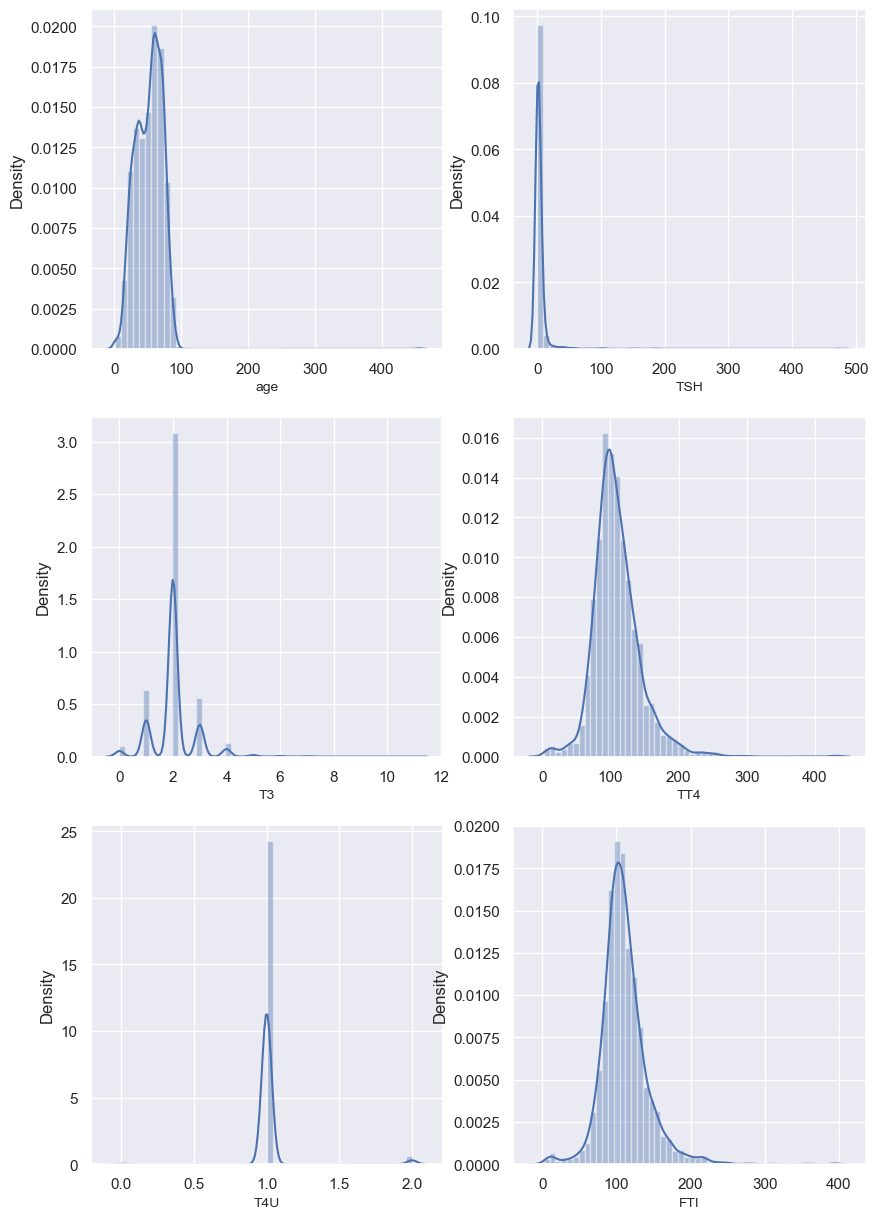

In [30]:
columns = ['age','TSH','T3','TT4','T4U','FTI']

plot.figure(figsize=(10,15),facecolor='white')
plotnumber = 1

for column in columns:
    ax = plot.subplot(3,2,plotnumber)
    sns.distplot(new_df[column])
    plot.xlabel(column,fontsize=10)
    plotnumber+=1
plot.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

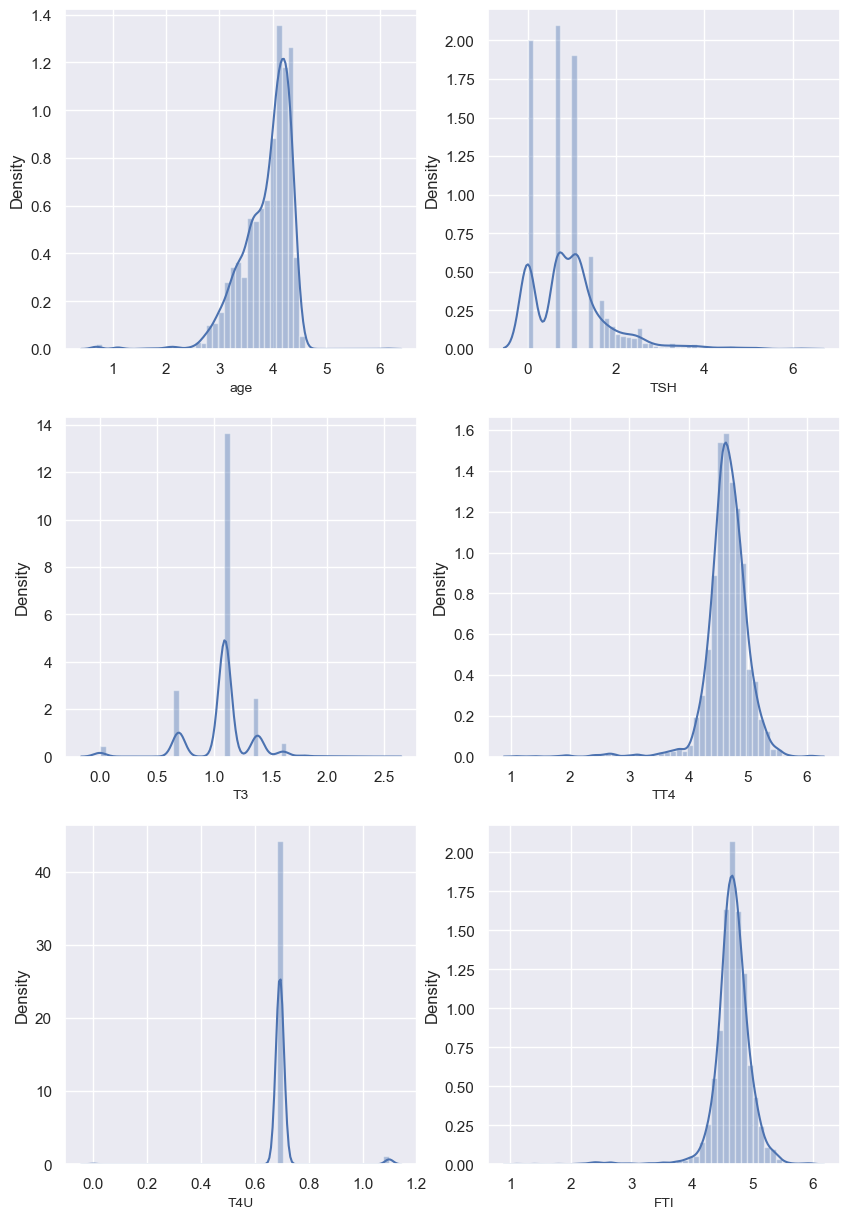

In [31]:
# The graphs for age, TSH, and T3 appear to be heavily skewed to the left.
# Let's try some data manipulations and see if it enhances the plot.
# Before we begin the log transformation, let us add 1 to each value in the column to handle
# the exception that occurs when we try to discover a log of '0'.

columns = ['age','TSH','T3','TT4','T4U','FTI']

plot.figure(figsize=(10,15),facecolor='white')
plotnumber = 1

for column in columns:
    new_df[column]+=1
    ax = plot.subplot(3,2,plotnumber)
    sns.distplot(np.log(new_df[column]))
    plot.xlabel(column,fontsize=10)
    plotnumber+=1
plot.show()


Upon looking at the above graph, the TSH column does not have a good distribution and it looks better to drop it for the analysis of data

In [32]:
new_df = new_df.drop(['TSH'],axis=1)

In [33]:
new_df.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4,T4U,FTI,Class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
count,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,...,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000
mean,52.846071,0.311071,0.117857,0.014286,0.012143,0.039286,0.014643,0.013929,0.017143,0.058214,...,3.033571,110.166786,2.022500,111.580357,0.969286,0.032500,0.098214,0.011071,0.275357,0.582857
std,20.457737,0.463015,0.322496,0.118687,0.109543,0.194309,0.120140,0.117215,0.129827,0.234190,...,0.782728,34.547817,0.166487,31.953767,0.282488,0.177356,0.297657,0.104655,0.446774,0.493175
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,3.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,90.000000,2.000000,94.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,105.000000,2.000000,108.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,68.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,126.000000,2.000000,125.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,456.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,12.000000,431.000000,3.000000,396.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now lets check if there is any partiality or imbalance in the target class.

<AxesSubplot:xlabel='Class', ylabel='count'>

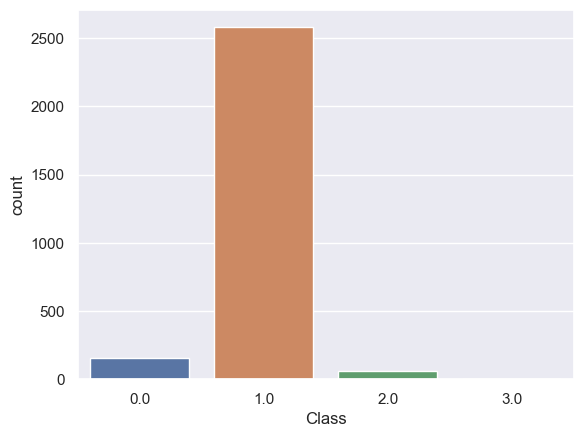

In [34]:
sns.countplot(x=new_df['Class'])

By looking at the above graph, it seems that the class 1 occurence are extremely higher when compared to the other ones. That makes the Class column highly imbalanced.

We are going to use python library imbalanced-learn to deal with imbalanced data. RandomOverSampler is an algorithm in it which can be used.

Referred this link https://github.com/scikit-learn-contrib/imbalanced-learn


In [35]:
x = new_df.drop(['Class'],axis=1) # Dropping the class column and making the X dataframe
y = new_df['Class'] # Dropping the y column and making the y dataframe
rdsmple = RandomOverSampler() # Initializing the RandomOverSampler()
x_sampled,y_sampled  = rdsmple.fit_resample(x,y) # Resample the dataset.

In [36]:
x_sampled.shape, y_sampled.shape # Checking the shape of the new data

((10320, 25), (10320,))

In [37]:
x_sampled = pd.DataFrame(data = x_sampled, columns = x.columns)

<AxesSubplot:xlabel='Class', ylabel='count'>

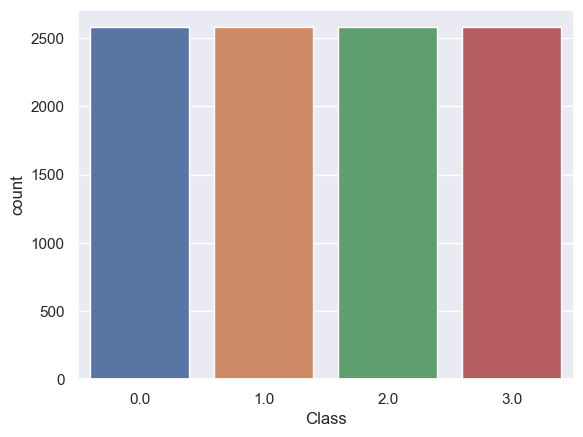

In [38]:
sns.countplot(x=y_sampled) # Using the sns.countplay to check the distribution of class types in the dataset.

Finally, pre-processing of dataset is done. It looks better and balanced now, we will do the model training on this dataset.

In [39]:
x_sampled.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,psych,T3,TT4,T4U,FTI,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,126.0,2.0,110.0,0.0,1.0,0.0,0.0,0.0
1,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,103.0,2.0,97.0,0.0,0.0,0.0,0.0,1.0
2,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,110.0,2.0,121.0,0.0,0.0,0.0,0.0,1.0
3,71.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,176.0,2.0,178.0,0.0,0.0,0.0,0.0,1.0
4,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,62.0,2.0,71.0,0.0,0.0,0.0,1.0,0.0


In [40]:
new_df_out = pd.concat([x_sampled,y_sampled],axis=1)

In [41]:
new_df_out.to_csv('Pre-Process-Data.csv')

### Utility function model_saving() is used to save the model to the directories

In [42]:
def model_saving(model,file_name):
    with open('models'+'/'+file_name+'.sav', 'wb') as f:
        pickle.dump(model, f)

# Clustering

We are using the clustering model KMeans to cluster/divide our data into small parts. After performing the clustering, we can train the different models data on different clusters so that the accuracy will be improved.  

In [43]:
# Importing the libraries such as sklearn.cluster and kneed to cluster the data

from sklearn.cluster import KMeans
from kneed import KneeLocator
import matplotlib.pyplot as plt
# from file_operations import file_methods

Here we are finding the K value that is the number of clusters to divide the data using the Elbow model, we can see from the graph that the graph is decreasing steeply after 3 on the x-axis. Hence, 3 number of clusters

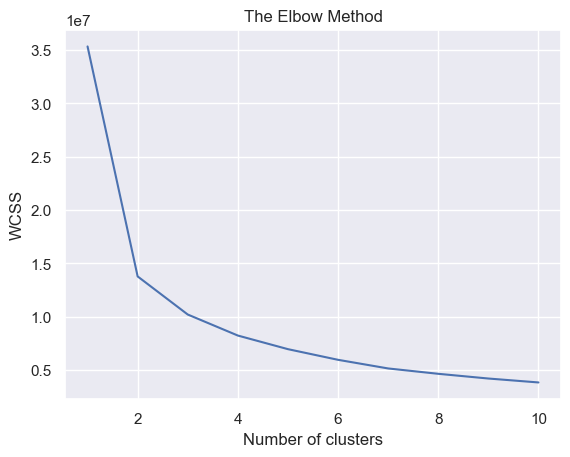

In [44]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42) # initializing the KMeans object
    kmeans.fit(x_sampled) # fitting the data to the KMeans Algorithm
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss) # creating the graph between WCSS and the number of clusters
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Another method of finding the K value is KneeLocater, it gives us the K Value directly.

In [45]:
kn = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
number_of_clusters = kn.knee
print('Number of Clusters (K) = ',kn.knee)

Number of Clusters (K) =  3


In [46]:
# Below code initializes a KMeans object with the specified number of clusters

kmeans = KMeans(n_clusters=number_of_clusters, init='k-means++', random_state=42)

In [47]:
# Below code applies the K-means clustering algorithm on a dataset x_sampled and assigns each data point in the dataset to
# one of the clusters. The resulting cluster assignments are stored in the y_kmeans variable.
y_kmeans=kmeans.fit_predict(x_sampled)

### Saving the Clustering Kmeans model to the directory 

In [48]:
# model_saving is a custom function used for saving the model to the file system. Its definition can be seen up.

model_saving(kmeans,'kmeans_clustering')

In [49]:
# Creating a column named Cluster on the x_sampled dataframe consisting of the cluster values each record has been assigned
x_sampled['Cluster'] = y_kmeans
x_sampled

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4,T4U,FTI,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other,Cluster
0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,126.0,2.0,110.0,0.0,1.0,0.0,0.0,0.0,1
1,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,103.0,2.0,97.0,0.0,0.0,0.0,0.0,1.0,2
2,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,110.0,2.0,121.0,0.0,0.0,0.0,0.0,1.0,1
3,71.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,176.0,2.0,178.0,0.0,0.0,0.0,0.0,1.0,1
4,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,62.0,2.0,71.0,0.0,0.0,0.0,1.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10315,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,49.0,2.0,55.0,0.0,0.0,0.0,0.0,1.0,0
10316,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,3.0,23.0,2.0,58.0,0.0,0.0,0.0,0.0,1.0,0
10317,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,3.0,23.0,2.0,58.0,0.0,0.0,0.0,0.0,1.0,0
10318,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,49.0,2.0,55.0,0.0,0.0,0.0,0.0,1.0,0


In [50]:
# Putting back the labels column to the dataset x_sampled
x_sampled['Labels'] = y_sampled

In [51]:
x_sampled.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U,FTI,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other,Cluster,Labels
0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,126.0,2.0,110.0,0.0,1.0,0.0,0.0,0.0,1,1.0
1,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,103.0,2.0,97.0,0.0,0.0,0.0,0.0,1.0,2,1.0
2,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,110.0,2.0,121.0,0.0,0.0,0.0,0.0,1.0,1,1.0
3,71.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,176.0,2.0,178.0,0.0,0.0,0.0,0.0,1.0,1,1.0
4,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,62.0,2.0,71.0,0.0,0.0,0.0,1.0,0.0,2,1.0


In [52]:
list_of_clusters = x_sampled['Cluster'].unique()
list_of_clusters

array([1, 2, 0])

In [53]:
features_all = x_sampled.drop(columns=['Cluster','Labels'])
label = x_sampled['Labels']

In [54]:
features_all.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,psych,T3,TT4,T4U,FTI,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,126.0,2.0,110.0,0.0,1.0,0.0,0.0,0.0
1,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,103.0,2.0,97.0,0.0,0.0,0.0,0.0,1.0
2,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,110.0,2.0,121.0,0.0,0.0,0.0,0.0,1.0
3,71.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,176.0,2.0,178.0,0.0,0.0,0.0,0.0,1.0
4,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,62.0,2.0,71.0,0.0,0.0,0.0,1.0,0.0


In [55]:
label.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Labels, dtype: float64

# Feature Selection

We will be selecting / Shortlisting the features that are of core importance to us because we cannot focus on all the 25 features in this project. I am using the decision tree and random forest property (feature_importances_) to find out the important features. Plot a graph using it and go ahead with only them.

### DecisionTreeClassifier implementation on the entire dataset (all clusters) to get the most important features using feature_importances_

In [56]:
# Importing the required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics  import roc_auc_score,accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [57]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

x_train, x_test, y_train, y_test = train_test_split(features_all, label, test_size=0.2, random_state=355)

# Decision Tree implementation on all the clusters
decisonTree = DecisionTreeClassifier(criterion = 'entropy', max_depth =24, min_samples_leaf= 1)

# Fitting the training data
decisonTree.fit(x_train,y_train)

# Getting the score using test data
decisonTree.score(x_test,y_test)

0.9626937984496124

['FTI', 'TT4', 'age', 'referral_source_SVI', 'T3', 'referral_source_other', 'on_thyroxine', 'psych', 'query_hyperthyroid', 'sex', 'referral_source_STMW', 'query_hypothyroid', 'referral_source_SVHD', 'referral_source_SVHC', 'tumor', 'T4U', 'goitre', 'query_on_thyroxine', 'thyroid_surgery', 'sick', 'on_antithyroid_medication', 'I131_treatment', 'pregnant', 'lithium', 'hypopituitary']


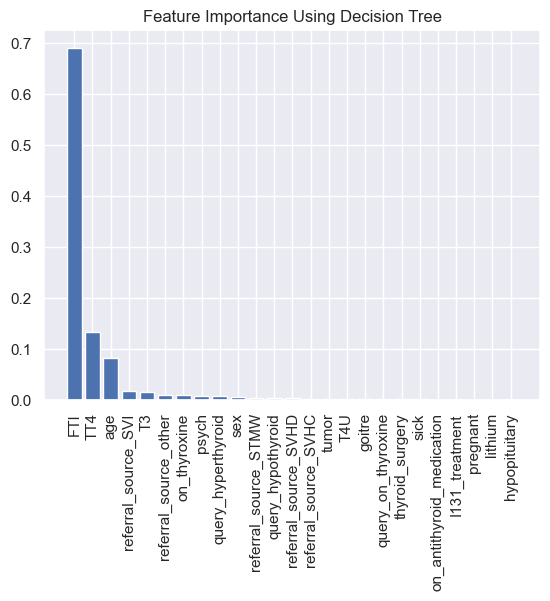

In [58]:
# Get feature importances
importances = decisonTree.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [x_train.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance Using Decision Tree")

# Add bars
plt.bar(range(x_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(x_train.shape[1]), names, rotation=90)
print(names)
# Show plot
plt.show()

### RandomForestClassifier implementation on the entire dataset (all clusters) to get the most important features using feature_importances_

In [59]:
# The code splits a dataset into training and testing sets using the train_test_split function

x_train, x_test, y_train, y_test = train_test_split(features_all, label, test_size=0.2, random_state=355)

# Trains a random forest classifier on the training set using the RandomForestClassifier
clf = RandomForestClassifier(criterion='entropy',n_estimators=100, random_state=42)
clf.fit(x_train,y_train)

# evaluates the performance
clf.score(x_test,y_test)

0.9883720930232558

['FTI', 'TT4', 'age', 'T3', 'referral_source_other', 'query_hypothyroid', 'sex', 'referral_source_SVI', 'on_thyroxine', 'sick', 'query_hyperthyroid', 'referral_source_SVHC', 'referral_source_STMW', 'T4U', 'psych', 'thyroid_surgery', 'tumor', 'query_on_thyroxine', 'I131_treatment', 'on_antithyroid_medication', 'referral_source_SVHD', 'goitre', 'pregnant', 'lithium', 'hypopituitary']


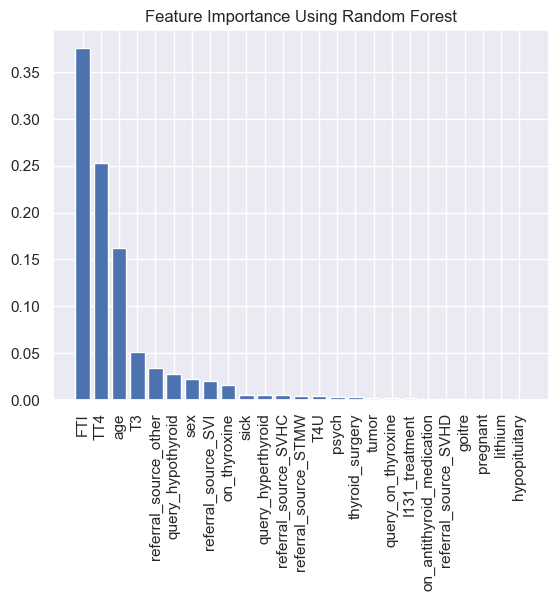

In [60]:
# Get feature importances
importances = clf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [x_train.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance Using Random Forest")

# Add bars
plt.bar(range(x_train.shape[1]), importances[indices])
print(names)
# Add feature names as x-axis labels
plt.xticks(range(x_train.shape[1]), names, rotation=90)

# Show plot
plt.show()

## Feature Shortlisting

After carefully comparing both the features importance from decision tree and RandomForest, I am going ahead with the below features.

['FTI', 'TT4', 'age', 'T3', 'query_hypothyroid', 'referral_source_SVI', 'sex', 'on_thyroxine', 'referral_source_STMW']


Till Now we have pre-processed the dataset and clustered it into 3 different clusters.

# Finding the best model for our clusters

We are using only DecisionTree and RandomForest algorithms for this project purpose. We could have used other classification algorithms such as Naive Bayes, Decision Trees, Support Vector Machines (SVM) or XGBoost. But for reducing the computation time, I am using only two models. 

Note: As part of extension of this project, we can use different models mentioned above.

In [61]:
rfcl = RandomForestClassifier() # Initializing RandomForestClassifier() object with default parameters
dtree_clfm = DecisionTreeClassifier() # Initializing DecisionTreeClassifier() object with default parameters

### Our actual model training starts from here.

I have created various functions to train the models. One of the benefit of creating the functions is code reusability, we can use this functions wherever want in the entire notebook without writing the same code code again and again. Another use is that the creating the code in blocks will help us in finding out the bugs.


get_best_model_for_random_forest():
This function takes the training feature columns, target columns and the object of random forest.

It used the GridSearchCV() for hyperparameter tuning of random forest model or else finding the best hyperparameters for a machine learning model in order to achieve the best possible performance on a given task.

After getting the best parameters based on the data, these parameters will be used to create the models and applied to the dataset.

Output: It returns the RadomForestClassifier() model which is ready for testing and prediction 

In [62]:
def get_best_model_for_random_forest(train_x,train_y,rfcl):
    
    # initializing with different combination of parameters
    param_grid = {"n_estimators": [10, 50, 100, 130], "criterion": ['gini', 'entropy'],
                  "max_depth": range(2, 4, 1), "max_features": ['auto', 'log2']}
    
    #Creating an object of the Grid Search class
    grid = GridSearchCV(estimator=rfcl, param_grid=param_grid, cv=5,  verbose=3)
    
     #finding the best parameters
    grid.fit(train_x, train_y)
    
    #extracting the best parameters
    criterion = grid.best_params_['criterion']
    max_depth = grid.best_params_['max_depth']
    max_features = grid.best_params_['max_features']
    n_estimators = grid.best_params_['n_estimators']
    
    #creating a new model with the best parameters
    rfcl = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, 
                                 max_depth=max_depth, max_features=max_features)
    # training the mew model
    rfcl.fit(train_x, train_y)
    
    return rfcl

get_best_model_for_DecisionTree(): This function takes the training feature columns, target columns and the object of DecisionTree() model.

After obtaining the best parameters from the GridSearchCV(), it uses them to create the DecisionTree model with the best parameters.

Output: It returns the DecisionTreeClassifier() model which is ready for testing and prediction.

In [63]:
def get_best_model_for_DecisionTree(train_x, train_y,dtree_clf):
     # initializing with different combination of parameters
    param_grid_decisionTree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
     }

    # Creating an object of the Grid Search class
    grid = GridSearchCV(dtree_clf, param_grid = param_grid_decisionTree, verbose=3,cv=5)
    # finding the best parameters
    grid.fit(train_x, train_y)

     # extracting the best parameters
    #extracting the best parameters
    criterion = grid.best_params_['criterion']
    max_depth = grid.best_params_['max_depth']
    min_samples_split = grid.best_params_['min_samples_split']
    min_samples_leaf = grid.best_params_['min_samples_leaf']
    
    #creating a new model with the best parameters
    dtree_clf = DecisionTreeClassifier(criterion=criterion,max_depth=max_depth, 
                                       min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf)
    
    # training the mew model
    dtree_clf.fit(train_x, train_y)
    return dtree_clf

get_best_model() takes the input of training, testing data and the cluster number

It uses the get_best_model_for_DecisionTree() and get_best_model_for_random_forest() functions to obtain the best model with the hypertuned parameters. Compares the accuracy of both the models and returns the one which has the highest. More explanation of the code is provided using in-line comments.

In [64]:
def get_best_model(train_x,train_y,test_x,test_y,i):
    
    # Prediction using DecisionTree
    dtree_clf = get_best_model_for_DecisionTree(train_x,train_y,dtree_clfm) # dtree_clf stores the decision tree model after training
    
    # Predictions using the decision tree Model
    prediction_dtree = dtree_clf.predict_proba(test_x)
    
    if len(test_y.unique()) == 1: #if there is only one label in y, then roc_auc_score returns error. We will use accuracy in that case
        dtree_score = accuracy_score(test_y, prediction_dtree)
    else:
        dtree_score = roc_auc_score(test_y, prediction_dtree, multi_class='ovr') # AUC for Decision Tree
    
     # Saving the Model Information  
    all_models_map['Model_Name'].append('Decison_Tree_'+str(i))
    all_models_map['Model_Score'].append(dtree_score)
    all_models_map['Model_Object'].append(dtree_clf)
    
    # Prediction using Random Forest
    
    random_forest= get_best_model_for_random_forest(train_x,train_y,rfcl)
    

    prediction_random_forest = random_forest.predict_proba(test_x)
    
 
    if len(test_y.unique()) == 1:#if there is only one label in y, then roc_auc_score returns error. We will use accuracy in that case
        random_forest_score = accuracy_score((test_y),prediction_random_forest)
    else:
        random_forest_score = roc_auc_score((test_y), prediction_random_forest,multi_class='ovr') # AUC for Random Forest
    
    # Saving the Model Information 
    all_models_map['Model_Name'].append('Random-Forest_'+str(i))
    all_models_map['Model_Score'].append(random_forest_score)
    all_models_map['Model_Object'].append(random_forest)
                                        
    #comparing the two models
    if(random_forest_score <  dtree_score):
        best_scores_models['Model_Name'].append('Decison_Tree_'+str(i))
        best_scores_models['Score'].append(dtree_score)
        return 'Decision_Tree',dtree_clf
    else:
        best_scores_models['Model_Name'].append('Random_Forest_'+str(i))
        best_scores_models['Score'].append(random_forest_score)
        return 'RandomForest',random_forest

# Model Training:

The below code is used for parsing all the clusters and looking for the best ML algorithm to fit on individual cluster.

    1.It splits the each cluster's data into both train and test using train_test_split().
    2.It uses the get_best_model() function to get the best model with hypertuning. 
    3.It saves the model to the file system using the custom model_saving() method.

In [65]:
%%time

# scores_models.clear() # First clearing the scores_models so that it does not append the scores every time this cell runs

best_model_repo = {'Model_Name':[],'Model':[]} # Stores the best model information with its hyper-parameters

best_scores_models = {'Model_Name':[],'Score':[]} # Stores the Score of only the best models

all_models_map = {'Model_Name':[],'Model_Object':[],'Model_Score':[]} # Stores the critical information such as Model Name, 
                                                                      # model Object, and Model Score of all the models

Cluster_Feature = [[] for _ in range(len(list_of_clusters))]
Cluster_Label = [[] for _ in range(len(list_of_clusters))]
for i in list_of_clusters:
    
    
    cluster_data=x_sampled[x_sampled['Cluster']==i]
    
    # Prepare the feature and Label columns
    cluster_features=cluster_data[['FTI', 'TT4', 'age', 'T3', 'query_hypothyroid', 'referral_source_SVI', 'sex', 'on_thyroxine', 'referral_source_STMW']]
    cluster_label= cluster_data['Labels']
    
    Cluster_Feature[i]= cluster_features
    Cluster_Label[i] = cluster_label
    
    # splitting the data into training and test set for each cluster one by one
    x_train, x_test, y_train, y_test = train_test_split(cluster_features, cluster_label, test_size=0.2, random_state=355)
    best_model_name, best_model = get_best_model(x_train,y_train,x_test,y_test,i)
    best_model_repo['Model_Name'].append(best_model_name+str(i))
    best_model_repo['Model'].append(best_model)
    model_saving(best_model,best_model_name+str(i))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.740 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.719 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.682 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.723 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.698 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3;, score=0.740 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3;, score=0.719 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3;, score=0.682 total time=   0.0s
[CV 4/5] END crite

[CV 4/5] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=3;, score=0.781 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=3;, score=0.749 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=4;, score=0.784 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=4;, score=0.808 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=4;, score=0.729 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=4;, score=0.781 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=4;, score=0.749 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=2;, score=0.784 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=

[CV 4/5] END criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.658 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.625 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=3;, score=0.644 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=3;, score=0.634 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=3;, score=0.613 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=3;, score=0.658 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=3;, score=0.625 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=4;, score=0.644 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, min_samples

[CV 3/5] END criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=3;, score=0.661 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=3;, score=0.705 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=3;, score=0.674 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=4;, score=0.716 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=4;, score=0.671 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=4;, score=0.661 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=4;, score=0.705 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=4;, score=0.674 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, min_samples

[CV 1/5] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=2;, score=0.815 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=2;, score=0.784 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=2;, score=0.753 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=2;, score=0.795 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=2;, score=0.784 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=3;, score=0.815 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=3;, score=0.784 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=3;, score=0.753 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, min_samples

[CV 4/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=130;, score=0.747 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=130;, score=0.763 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=10;, score=0.767 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=10;, score=0.743 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=10;, score=0.709 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=10;, score=0.771 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=10;, score=0.725 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=50;, score=0.795 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=50;, score=0.760 total time=   0.0s
[CV 3/5]

[CV 3/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=100;, score=0.682 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=100;, score=0.747 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=100;, score=0.732 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=130;, score=0.736 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=130;, score=0.764 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=130;, score=0.716 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=130;, score=0.757 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=130;, score=0.739 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=10;, score=

[CV 2/5] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=4;, score=0.668 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=4;, score=0.609 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=4;, score=0.608 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=4;, score=0.645 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=2;, score=0.627 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=2;, score=0.668 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=2;, score=0.609 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=2;, score=0.608 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=

[CV 5/5] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4;, score=0.670 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2;, score=0.652 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2;, score=0.699 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2;, score=0.697 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2;, score=0.658 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2;, score=0.668 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=3;, score=0.652 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=3;, score=0.699 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=

[CV 4/5] END criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=3;, score=0.608 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=3;, score=0.594 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=4;, score=0.609 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=4;, score=0.577 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=4;, score=0.606 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=4;, score=0.608 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=4;, score=0.594 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=2;, score=0.643 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, min_samples

[CV 2/5] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=2;, score=0.688 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=2;, score=0.720 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=2;, score=0.624 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=2;, score=0.671 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=3;, score=0.647 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=3;, score=0.688 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=3;, score=0.720 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=3;, score=0.624 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, min_samples

[CV 5/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=130;, score=0.709 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=10;, score=0.677 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=10;, score=0.699 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=10;, score=0.676 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=10;, score=0.704 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=10;, score=0.686 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=50;, score=0.642 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=50;, score=0.677 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=50;, score=0.695 total time=   0.0s
[CV 4/5] 

[CV 3/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=100;, score=0.688 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=100;, score=0.697 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=100;, score=0.722 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=130;, score=0.688 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=130;, score=0.694 total time=   0.3s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=130;, score=0.697 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=130;, score=0.665 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=130;, score=0.732 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=10;, score=

[CV 3/5] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=3;, score=0.990 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=3;, score=0.990 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=3;, score=0.988 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=4;, score=0.989 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=4;, score=0.989 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=4;, score=0.990 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=4;, score=0.990 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=4;, score=0.988 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=

[CV 3/5] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2;, score=0.995 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2;, score=0.994 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2;, score=0.996 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=3;, score=0.995 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=3;, score=0.998 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=3;, score=0.995 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=3;, score=0.994 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=3;, score=0.998 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=

[CV 3/5] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=4;, score=0.990 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=4;, score=0.990 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=4;, score=0.988 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=2;, score=0.989 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=2;, score=0.989 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=2;, score=0.990 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=2;, score=0.990 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=2;, score=0.988 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, min_samples

[CV 3/5] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=3;, score=0.995 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=3;, score=0.996 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=3;, score=0.998 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=4;, score=0.995 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=4;, score=0.998 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=4;, score=0.995 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=4;, score=0.996 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=4;, score=0.998 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, min_samples

[CV 1/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=100;, score=0.988 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=100;, score=0.986 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=100;, score=0.981 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=100;, score=0.986 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=100;, score=0.989 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=130;, score=0.988 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=130;, score=0.986 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=130;, score=0.986 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=3, max_features=auto, n_estimators=130;, score=0.986 total time=   0.3s
[

[CV 1/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=50;, score=0.988 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=50;, score=0.986 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=50;, score=0.986 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=50;, score=0.986 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=50;, score=0.989 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=100;, score=0.988 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=100;, score=0.986 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=100;, score=0.986 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=auto, n_estimators=100;, score=0.98

# Model Evaluation

The below table gives us the accuracy of the best Models for each clusters. By looking at this tables we can conclude that the RandomForests are best suited for this dataset. The accuracy of the random forest for the clusters 1 and 2 is nearly 95 % which is pretty impressive. The accuracy of 98% for the cluster 0 suggests that the this model might be overfitted because of the data.

In [66]:
#  Checking the best model's score per cluster
pd.DataFrame(best_scores_models)

,Model_Name,Score
0,Decison_Tree_1,0.916565
1,Random_Forest_2,0.857126
2,Random_Forest_0,0.989846


The below table illustrates the scores of all the models (RandomForest and Decision Tree). The decision tree model scores are also pretty impressive here.

In [67]:
# Checking all the models scores.
pd.DataFrame({'Model_Name':all_models_map['Model_Name'],'Model_Score':all_models_map['Model_Score']},index=None)

,Model_Name,Model_Score
0,Decison_Tree_1,0.916565
1,Random-Forest_1,0.906642
2,Decison_Tree_2,0.831382
3,Random-Forest_2,0.857126
4,Decison_Tree_0,0.939351
5,Random-Forest_0,0.989846


## Classification_report for Cluster 0 || DecisionTreeClassifier() 
I am passing the each cluster data to the decision tree and calculating the precision, recall, f1-score using classification_report

In [68]:
# Filteting only the required cluster data 
test_data = x_sampled[x_sampled['Cluster']==0]

# Selecting the required Features

cluster_features=test_data[['FTI', 'TT4', 'age', 'T3', 'query_hypothyroid', 'referral_source_SVI', 'sex', 'on_thyroxine', 'referral_source_STMW']]
cluster_label= test_data['Labels']

# Splitting the test and train data

x_train, x_test, y_train, y_test = train_test_split(cluster_features, cluster_label, test_size=0.2, random_state=355)

# creating and implementing the decision tree classifier on the dataset

dclf = DecisionTreeClassifier()
dclf = get_best_model_for_DecisionTree(x_train,y_train,dclf)

dclf.score(x_test,y_test)
# all_models_map['Model_Object'][0].score(x_train,y_train)

# Predicting the x_test 
y_pred = dclf.predict(x_test)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.973 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.976 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.979 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.976 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.976 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3;, score=0.973 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3;, score=0.976 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3;, score=0.979 total time=   0.0s
[CV 4/5] END crite

[CV 2/5] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=3;, score=0.989 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=3;, score=0.990 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=3;, score=0.990 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=3;, score=0.988 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=4;, score=0.989 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=4;, score=0.989 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=4;, score=0.990 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=4;, score=0.990 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=

[CV 2/5] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4;, score=0.998 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4;, score=0.995 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4;, score=0.996 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4;, score=0.998 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2;, score=0.995 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2;, score=0.998 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2;, score=0.995 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2;, score=0.994 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=

[CV 3/5] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=4;, score=0.990 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=4;, score=0.990 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=4;, score=0.988 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=2;, score=0.989 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=2;, score=0.989 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=2;, score=0.990 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=2;, score=0.990 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=2;, score=0.988 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, min_samples

[CV 4/5] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2;, score=0.996 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2;, score=0.996 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=3;, score=0.995 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=3;, score=0.998 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=3;, score=0.995 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=3;, score=0.996 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=3;, score=0.998 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=4;, score=0.995 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, min_samples

In [69]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        12
         1.0       1.00      0.40      0.57         5
         2.0       1.00      1.00      1.00       449
         3.0       1.00      1.00      1.00       536

    accuracy                           1.00      1002
   macro avg       0.98      0.85      0.88      1002
weighted avg       1.00      1.00      1.00      1002



## Classification_report for Cluster 1 || DecisionTreeClassifier()
I am passing the each cluster data to the decision tree and calculating the precision, recall, f1-score using classification_report

In [70]:
# Filteting only the required cluster data 
test_data = x_sampled[x_sampled['Cluster']==1]

# Selecting the required Features

cluster_features=test_data[['FTI', 'TT4', 'age', 'T3', 'query_hypothyroid', 'referral_source_SVI', 'sex', 'on_thyroxine', 'referral_source_STMW']]
cluster_label= test_data['Labels']

# Splitting the test and train data

x_train, x_test, y_train, y_test = train_test_split(cluster_features, cluster_label, test_size=0.2, random_state=355)

# creating and implementing the decision tree classifier on the dataset

dclf = DecisionTreeClassifier()
dclf = get_best_model_for_DecisionTree(x_train,y_train,dclf)

dclf.score(x_test,y_test)
# all_models_map['Model_Object'][0].score(x_train,y_train)

# Predicting the x_test 
y_pred = dclf.predict(x_test)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.740 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.719 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.682 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.723 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.698 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3;, score=0.740 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3;, score=0.719 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3;, score=0.682 total time=   0.0s
[CV 4/5] END crite

[CV 5/5] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=2;, score=0.739 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=3;, score=0.764 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=3;, score=0.767 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=3;, score=0.705 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=3;, score=0.767 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=3;, score=0.739 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=4;, score=0.764 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=4;, score=0.767 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=

[CV 5/5] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=3;, score=0.784 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=4;, score=0.818 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=4;, score=0.825 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=4;, score=0.781 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=4;, score=0.839 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=4;, score=0.784 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.644 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.634 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, min_samples_leaf=1, min_sampl

[CV 4/5] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=4;, score=0.705 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=4;, score=0.674 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=2;, score=0.716 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=2;, score=0.671 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=2;, score=0.661 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=2;, score=0.705 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=2;, score=0.674 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=3;, score=0.716 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, min_samples

[CV 4/5] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=3;, score=0.795 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=3;, score=0.784 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=4;, score=0.815 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=4;, score=0.784 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=4;, score=0.753 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=4;, score=0.801 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=4;, score=0.784 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2;, score=0.815 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, min_samples

In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.51      0.63       103
         1.0       0.81      0.95      0.88       250
         2.0       1.00      0.50      0.67        12

    accuracy                           0.81       365
   macro avg       0.87      0.66      0.72       365
weighted avg       0.82      0.81      0.80       365



## Classification_report for Cluster 2 || DecisionTreeClassifier()

I am passing the each cluster data to the decision tree and calculating the precision, recall, f1-score using classification_report

In [72]:
%%time
#  If condition is used to check if this data has 3 clusters, otherwise this code will generate error
if len(list_of_clusters)>2:
    # Filteting only the required cluster data 
    test_data = x_sampled[x_sampled['Cluster']==2]

    # Selecting the required Features

    cluster_features=test_data[['FTI', 'TT4', 'age', 'T3', 'query_hypothyroid', 'referral_source_SVI', 'sex', 'on_thyroxine', 'referral_source_STMW']]
    cluster_label= test_data['Labels']

    # Splitting the test and train data

    x_train, x_test, y_train, y_test = train_test_split(cluster_features, cluster_label, test_size=0.2, random_state=355)

    # creating and implementing the decision tree classifier on the dataset

    dclf = DecisionTreeClassifier()
    dclf = get_best_model_for_DecisionTree(x_train,y_train,dclf)

    dclf.score(x_test,y_test)
    # all_models_map['Model_Object'][0].score(x_train,y_train)

    # Predicting the x_test 
    y_pred = dclf.predict(x_test)
else:
    print('This code cell was not executed because, we do not have 3 clusters of data. It is supposed to find out the metrics for the cluster 3')


Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.563 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.565 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.595 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.595 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.583 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3;, score=0.563 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3;, score=0.565 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3;, score=0.595 total time=   0.0s
[CV 4/5] END crite

[CV 3/5] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=4;, score=0.609 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=4;, score=0.608 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=4;, score=0.645 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2;, score=0.654 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2;, score=0.699 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2;, score=0.717 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2;, score=0.625 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2;, score=0.666 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=

[CV 1/5] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4;, score=0.652 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4;, score=0.699 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4;, score=0.699 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4;, score=0.658 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4;, score=0.670 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2;, score=0.654 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2;, score=0.699 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2;, score=0.699 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=

[CV 4/5] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=3;, score=0.608 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=3;, score=0.594 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=4;, score=0.613 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=4;, score=0.577 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=4;, score=0.606 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=4;, score=0.608 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=4;, score=0.594 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=2;, score=0.609 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, min_samples

[CV 1/5] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=4;, score=0.643 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=4;, score=0.677 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=4;, score=0.717 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=4;, score=0.618 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=4;, score=0.655 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2;, score=0.647 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2;, score=0.688 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2;, score=0.720 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, min_samples

In [73]:
if len(list_of_clusters)>2:
    print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.58      0.67       407
         1.0       0.54      0.78      0.64       254
         2.0       1.00      1.00      1.00        37

    accuracy                           0.67       698
   macro avg       0.78      0.79      0.77       698
weighted avg       0.72      0.67      0.68       698



## Classification_report for Cluster 0 || RandomForestClassifier()

In [74]:
%%time
# Filteting only the required cluster data 
test_data = x_sampled[x_sampled['Cluster']==0]

# Selecting the required Features

cluster_features=test_data[['FTI', 'TT4', 'age', 'T3', 'query_hypothyroid', 'referral_source_SVI', 'sex', 'on_thyroxine', 'referral_source_STMW']]
cluster_label= test_data['Labels']

# Splitting the test and train data

x_train, x_test, y_train, y_test = train_test_split(cluster_features, cluster_label, test_size=0.2, random_state=355)

# creating and implementing the decision tree classifier on the dataset

rclf = RandomForestClassifier()
rclf = get_best_model_for_random_forest(x_train,y_train,rclf)

rclf.score(x_test,y_test)

# Predicting the x_test 
y_pred = rclf.predict(x_test)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=0.953 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=0.973 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=0.975 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=0.929 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=0.959 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=50;, score=0.960 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=50;, score=0.973 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=50;, score=0.965 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=aut

[CV 5/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=100;, score=0.985 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=130;, score=0.988 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=130;, score=0.986 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=130;, score=0.986 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=130;, score=0.986 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=130;, score=0.989 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, n_estimators=10;, score=0.953 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, n_estimators=10;, score=0.965 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, n_estimators=10;, score=0.949 total time=   

[CV 4/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=50;, score=0.971 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=50;, score=0.989 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=100;, score=0.988 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=100;, score=0.986 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=100;, score=0.986 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=100;, score=0.986 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=100;, score=0.989 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=130;, score=0.988 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=130;, score=0

In [75]:
print(classification_report(y_test,y_pred))
print('Score : ',rclf.score(x_test,y_test))

              precision    recall  f1-score   support

         0.0       0.80      0.33      0.47        12
         1.0       0.00      0.00      0.00         5
         2.0       0.98      1.00      0.99       449
         3.0       0.99      1.00      1.00       536

    accuracy                           0.99      1002
   macro avg       0.69      0.58      0.61      1002
weighted avg       0.98      0.99      0.98      1002

Score :  0.9870259481037924


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Classification_report for Cluster 1 || RandomForestClassifier()

In [76]:
%%time
# Filteting only the required cluster data 
test_data = x_sampled[x_sampled['Cluster']==1]

# Selecting the required Features

cluster_features=test_data[['FTI', 'TT4', 'age', 'T3', 'query_hypothyroid', 'referral_source_SVI', 'sex', 'on_thyroxine', 'referral_source_STMW']]
cluster_label= test_data['Labels']

# Splitting the test and train data

x_train, x_test, y_train, y_test = train_test_split(cluster_features, cluster_label, test_size=0.2, random_state=355)

# creating and implementing the decision tree classifier on the dataset

rclf = RandomForestClassifier()
rclf = get_best_model_for_random_forest(x_train,y_train,rclf)

rclf.score(x_test,y_test)

# Predicting the x_test 
y_pred = rclf.predict(x_test)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=0.695 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=0.692 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=0.664 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=0.716 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=0.663 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=50;, score=0.695 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=50;, score=0.664 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=50;, score=0.685 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=aut

[CV 5/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=100;, score=0.746 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=130;, score=0.795 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=130;, score=0.805 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=130;, score=0.740 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=130;, score=0.753 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=130;, score=0.742 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, n_estimators=10;, score=0.644 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, n_estimators=10;, score=0.658 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, n_estimators=10;, score=0.644 total time=   

[CV 4/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=50;, score=0.764 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=50;, score=0.746 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=100;, score=0.753 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=100;, score=0.771 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=100;, score=0.695 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=100;, score=0.743 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=100;, score=0.739 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=130;, score=0.716 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=130;, score=0

In [77]:
print(classification_report(y_test,y_pred))
print('Score : ',rclf.score(x_test,y_test))

              precision    recall  f1-score   support

         0.0       0.77      0.53      0.63       103
         1.0       0.81      0.94      0.87       250
         2.0       1.00      0.50      0.67        12

    accuracy                           0.81       365
   macro avg       0.86      0.66      0.72       365
weighted avg       0.81      0.81      0.80       365

Score :  0.8082191780821918


## Classification_report for Cluster 2 || RandomForestClassifier()

In [78]:

cluster_features=test_data[['FTI', 'TT4', 'age', 'T3', 'query_hypothyroid', 'referral_source_SVI', 'sex', 'on_thyroxine', 'referral_source_STMW']]
cluster_label= test_data['Labels']
cluster_features

,FTI,TT4,age,T3,query_hypothyroid,referral_source_SVI,sex,on_thyroxine,referral_source_STMW
0,110.0,126.0,42.0,3.0,0.0,0.0,0.0,0.0,0.0
2,121.0,110.0,47.0,3.0,0.0,0.0,1.0,0.0,0.0
3,178.0,176.0,71.0,3.0,0.0,0.0,0.0,1.0,0.0
5,142.0,184.0,19.0,3.0,0.0,0.0,0.0,1.0,0.0
8,133.0,124.0,67.0,3.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
7562,128.0,124.0,46.0,3.0,0.0,1.0,0.0,0.0,0.0
7644,128.0,124.0,46.0,3.0,0.0,1.0,0.0,0.0,0.0
7663,137.0,112.0,3.0,3.0,0.0,0.0,0.0,0.0,1.0
7693,137.0,112.0,3.0,3.0,0.0,0.0,0.0,0.0,1.0


In [79]:
%%time

#  If condition is used to check if this data has 3 clusters, otherwise this code will generate error
if len(list_of_clusters)>2:
    # Filteting only the required cluster data 
    test_data = x_sampled[x_sampled['Cluster']==2]

    # Selecting the required Features

    cluster_features=test_data[['FTI', 'TT4', 'age', 'T3', 'query_hypothyroid', 'referral_source_SVI', 'sex', 'on_thyroxine', 'referral_source_STMW']]
    cluster_label= test_data['Labels']

    # Splitting the test and train data

    x_train, x_test, y_train, y_test = train_test_split(cluster_features, cluster_label, test_size=0.2, random_state=355)

    # creating and implementing the decision tree classifier on the dataset

    rclf = RandomForestClassifier()
    rclf = get_best_model_for_random_forest(x_train,y_train,rclf)

    rclf.score(x_test,y_test)

    # Predicting the x_test 
    y_pred = rclf.predict(x_test)
else:
    print('This code cell was not executed because, we do not have 3 clusters of data. It is supposed to find out the metrics for the cluster 3')


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=0.640 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=0.656 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=0.652 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=0.649 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=0.583 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=50;, score=0.658 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=50;, score=0.656 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=50;, score=0.652 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=aut

[CV 5/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=100;, score=0.720 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=130;, score=0.672 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=130;, score=0.690 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=130;, score=0.703 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=130;, score=0.690 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=3, max_features=log2, n_estimators=130;, score=0.698 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=auto, n_estimators=10;, score=0.654 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=auto, n_estimators=10;, score=0.616 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=auto, n_estimators=10;, score=0.643 total time=   

[CV 3/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=50;, score=0.706 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=50;, score=0.681 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=50;, score=0.691 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=100;, score=0.692 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=100;, score=0.695 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=100;, score=0.710 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=100;, score=0.688 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=100;, score=0.697 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=130;, score=0.

In [80]:
if len(list_of_clusters)>2:
    print(classification_report(y_test,y_pred))
    print('Score : ',rclf.score(x_test,y_test))

              precision    recall  f1-score   support

         0.0       0.71      0.90      0.80       407
         1.0       0.73      0.41      0.52       254
         2.0       1.00      1.00      1.00        37

    accuracy                           0.73       698
   macro avg       0.81      0.77      0.77       698
weighted avg       0.73      0.73      0.71       698

Score :  0.7292263610315186


In [81]:
if len(list_of_clusters)>2:
    cluster_features

## Predicting records:

We are predicting the Thyroid using the RandomForestClassifier of second cluster below.

In [82]:
predict = rclf.predict(np.array([[97.0,103.0,24.0,3.0,0.0,0.0,0.0,0.0,0.0]]))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [83]:
# Decoding the label column using the inverse_transform Function
decoded_labels = lblEn.inverse_transform(df['Class'])
print(decoded_labels)

['negative' 'negative' 'negative' ... 'negative' 'negative' 'negative']


In [84]:
print(lblEn.inverse_transform(np.array([0])))

['compensated hypothyroid']


In [85]:
predict1 = rclf.predict(np.array([[100.0,43.0,24.0,3.0,1.0,1.0,1.0,1.0,0.0]]))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [86]:
# Decoding the label column using the inverse_transform Function
print(lblEn.inverse_transform(np.array([1])))

['negative']
